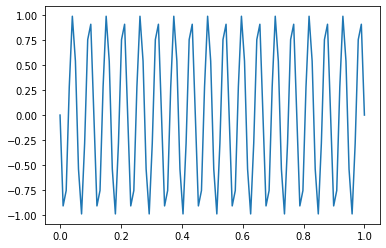

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

def sinsig(n, a, f, fs, time=1.0, phi = 0):
    x = np.linspace(0, time, n)
    x = x[:100]
    y = a * np.sin(2 * f * np.pi * n * x + phi)
    return x, y

f, fs, a, n, time = 18000, 48000, 1.0, 100, 0.0025

x, pulse = sinsig(n, a, f, fs)
plt.plot(x, pulse)

1010100011100110110100101101110011001110110100001110101011000010010000001010101011011100110100101110110011001010111001001110011011010010111010001111001
[2 2 2 0 3 2 1 2 3 1 0 2 3 1 3 0 3 0 3 2 3 1 0 0 3 2 2 2 3 0 0 2 1 0 0 0 2
 2 2 2 3 1 3 0 3 1 0 2 3 2 3 0 3 0 2 2 3 2 1 0 3 2 1 2 3 1 0 2 3 2 2 0 3 3
 0 1]


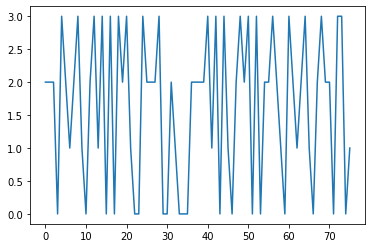

In [37]:
delta = 100
pause = [np.zeros((1, i * delta), dtype=np.float) for i in range(1, 5)]

from binascii import hexlify
my_str = 'Tsinghua University'
#my_str = '0000010100001010000011110000110000001000' # Project介绍里面要求用这个 5字节的16进制数5afc8
def encode(x):
    ''''''
    info = x.encode('ascii')
    info = hexlify(info)
    info = info.decode('ascii')
    info = int(info, 16)
    info = bin(info)
    info = str(info)[2:]
    ''''''
    #info = x
    length = len(info)
    print(info)
    arr = [int(info[2 * i:2 * i + 2], 2) for i in range(length // 2)]
    if length & 1 == 1:
        arr.append(int(info[-1], 2))
    arr = np.array(arr, dtype=np.short)
    print(arr)
    return arr
arr = encode(my_str)
plt.plot(arr)

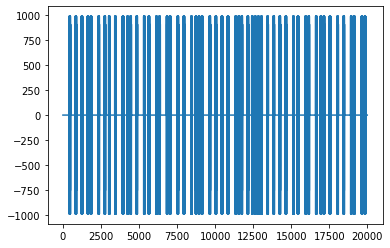

In [63]:
def syth(pulse, arr):
    sig = [np.append(pulse, pause[i]) for i in arr]
    sig = np.concatenate(sig, axis=0)
    sig = np.append(pause[3], sig)
    return sig * 1000
sig = syth(pulse, arr)
#print(sig[9000:10000])
sig = sig.astype(np.short)
x = np.linspace(0, 1, len(sig))
plt.plot(sig[:20000])
#print(sig.shape)

In [64]:
import wave
def writewav(data, filename, fs):
    print(data)
    with wave.open(filename, 'wb') as f:
        f.setnchannels(1)
        f.setsampwidth(2)
        f.setframerate(fs)
        f.writeframes(data.tostring())
        print(len(data))
        print(type(data[0]))
        print(len(data.tostring()))
writewav(sig, 'sample.wav', fs)

[0 0 0 ... 0 0 0]
28000
<class 'numpy.int16'>
56000


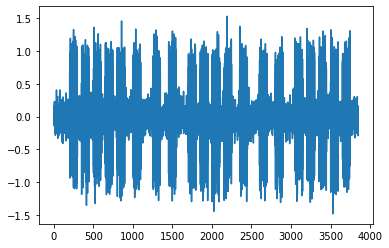

In [60]:
def awgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)

n = awgn(sig, 10)
sign = sig + n
plt.plot(sign)

In [7]:
import scipy.signal
fsr = 44100
delta = 500
def extract(data, fsr, f):
    b, a = signal.butter(N=6, Wn=[2 * (low) / fsr, 2 * high / fsr], type='bandpass', output='ba')